## Top Golf Courses in the United States Natural Language Process (NLP) Anlysis Overview

1. **Compare TF-IDF vs Doc2Vec for feature extraction** 
    - Vectorize the reviews using both TF-IDF and Doc2Vec (gensim library).
    - TF-IDF represents documents as a weighted vector of important words. Doc2Vec learns semantic vector representations of documents.
    - Compare the two approaches qualitatively and quantitatively (e.g. in downstream clustering/classification tasks) to see which captures more meaningful information from the reviews.

2. **Compare K-means clustering vs LDA for topic modeling**
    - Apply K-means clustering and LDA on the vectorized reviews to discover latent topics/themes discussed 
    - K-means aims to partition the reviews into K clusters based on feature similarity. LDA is a probabilistic model that assigns topic distributions to documents.
    - Evaluate the coherence and interpretability of the topics/clusters found by each method. Use metrics like silhouette score, perplexity, human judgment.

## Pre-phase: Importing Necessary Packages and Setting Up the Virtual Environment

In [1]:

"""
PRE-PHASE: SET UP THE ENVIRONMENT

Set up the environment with the necessary libraries, packages, and display configurations

Note: this code is written in Python 3.9, as this version of Python is compatable with the GenSim library
"""
# Enable multiple outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import the necessary libraries and packages
# Regular expressions, string manipulation, and file system operations
import re, string, os
# Data manipulation and analysis
import pandas as pd
# Scientific computing
import numpy as np
from numpy import triu
import scipy
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Natural language processing
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
# Gensim for topic modeling
from gensim.models import Word2Vec, LdaModel, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Display configurations
plt.style.use('ggplot')
sns.set_style('whitegrid')
# Set the random seed for reproducibility
np.random.seed(42)

# Download the English language model for spaCy
# !python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stefanjenss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Phase 1: Import the Corpus of Golf Course Reviews for the Top 30 Courses in the United States

In [2]:
"""
PHASE 0: IMPORT THE GOLF COURSE REVIEW CORPUS AND CONVERSION TO CSV FILE AND DATAFRAME
    1. Firstly, since I created the golf course review corpus using Excel, I will need to convert the Excel file to a CSV file. 
       I will use the pandas library to do this.
    2. Secondly, I will use the pandas library to read the CSV file and create a DataFrame.
"""

# Convert the Excel file to a CSV file
# Read the Excel file
FILE = 'golf_course_review_corpus_V2.xlsx'
golf_course_review = pd.read_excel(FILE)

# Save the DataFrame to a CSV file
golf_course_review.to_csv('golf_course_review_corpus.csv', index=False)

# Read the CSV file and create a DataFrame
golf_course_review = pd.read_csv('golf_course_review_corpus.csv')
golf_course_review.head()

'\nPHASE 0: IMPORT THE GOLF COURSE REVIEW CORPUS AND CONVERSION TO CSV FILE AND DATAFRAME\n    1. Firstly, since I created the golf course review corpus using Excel, I will need to convert the Excel file to a CSV file. \n       I will use the pandas library to do this.\n    2. Secondly, I will use the pandas library to read the CSV file and create a DataFrame.\n'

,review_id,course_name,location,architect,year_built,review_title,review_author,file_name,review_text
0,1,Pine Valley,"Pine Valley, NJ",George Crump / Harry S. Colt,1918,PINE VALLEY GOLF CLUB - 19 POINTS,David Jones,rev1_pine_valley_1,There’s not much point trying to do a hole-by-...
1,2,Pine Valley,"Pine Valley, NJ",George Crump / Harry S. Colt,1918,"Pine Valley Golf Club (Clementon, New Jersey)",Bill Satterfield,rev2_pine_valley_2,What to Expect: Pine Valley is the finest gol...
2,3,Cypress Point,"Pebble Beach, CA",Alister MacKenzie,1928,CYPRESS POINT REVIEW,Graylyn Loomis,rev3_cypress_point_1,“No one but a poet should be allowed to write ...
3,4,Cypress Point,"Pebble Beach, CA",Alister MacKenzie,1928,"Cypress Point Golf Club (Pebble Beach, Califor...",Bill Satterfield,rev4_cypress_point_2,What to Expect: I don't even feel worthy to w...
4,5,Shinnecock Hills,"Southampton, NY",William Flynn,1931,Review: Shinnecock Hills Golf Club,Andrew Harvie,rev5_shinnecock_1,"There’s not many courses as acclaimed, sought ..."


'\nPHASE 1: Exploratory Data Analysis (EDA)\n\nIn this phase, I will perform an exploratory data analysis (EDA) on the golf course review corpus to gain a better understanding of\nthe data. I will perform the following tasks:\n    1. Calculate the summary statistics for the year_built column to better understand the distribution of when these top golf courses\n       were built.\n    2. Create a histogram and boxplot of the year_built column to visualize the distribution of when these top golf courses were built.\n    3. Create a frequency distribution for the architect to understand if there are certain architects that designed more of these\n       top golf courses.\n    4. Create a frequency distribution for the location column to understand the distribution of these top golf courses across different\n       states. \n         - Note: The location column contains both the city and state information, so I will need to extract the state information\n    5. Create a frquency distribtio

count      60.000000
mean     1928.266667
std        26.483040
min      1895.000000
25%      1917.000000
50%      1924.500000
75%      1932.000000
max      2003.000000
Name: year_built, dtype: float64

<Figure size 1200x400 with 0 Axes>

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year_built', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Year Built for the Top 30 Golf Courses in the United States')

Text(0.5, 0, 'Year Built')

Text(0, 0.5, 'Frequency')

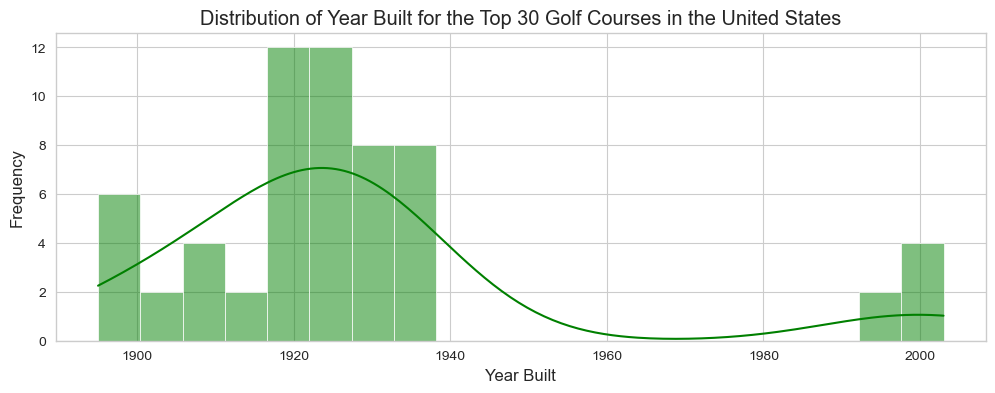

<Figure size 1200x300 with 0 Axes>

<Axes: xlabel='year_built'>

Text(0.5, 1.0, 'Box-and-Whisker Plot of Year Built for the Top 30 Golf Courses in the United States')

Text(0.5, 0, 'Year Built')

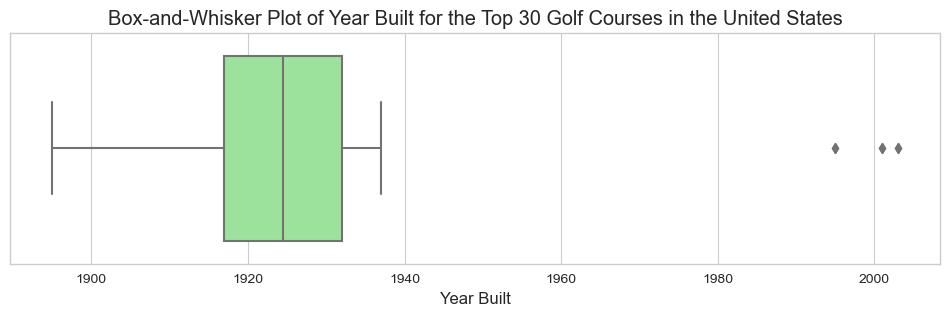

<Figure size 1200x600 with 0 Axes>

<Axes: ylabel='architect'>

Text(0.5, 1.0, 'Frequency Distribution of Architects for the Top 30 Golf Courses in the U.S.')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Architects')

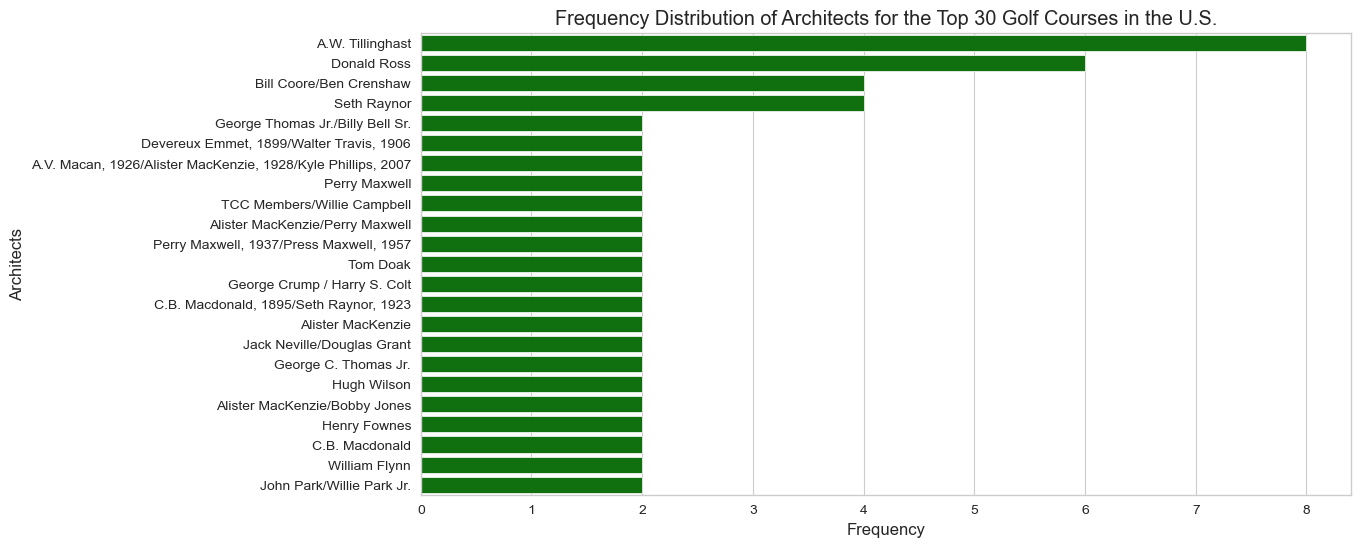

<Figure size 1200x400 with 0 Axes>

<Axes: ylabel='state'>

Text(0.5, 1.0, 'Frequency Distribution of Top 30 Golf Courses by state in the U.S.')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'State')

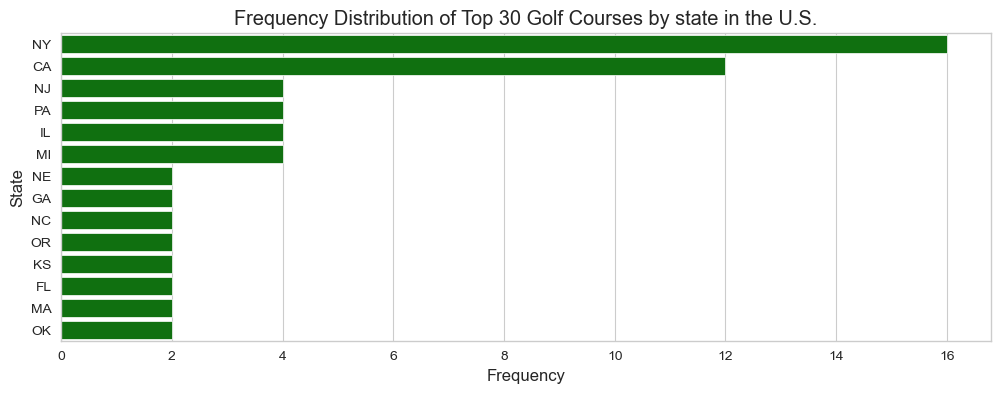

<Figure size 1200x400 with 0 Axes>

<Axes: ylabel='review_author'>

Text(0.5, 1.0, 'Frequency Distribution of Review Authors for the Top 30 Golf Courses in the U.S.')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Review Authors')

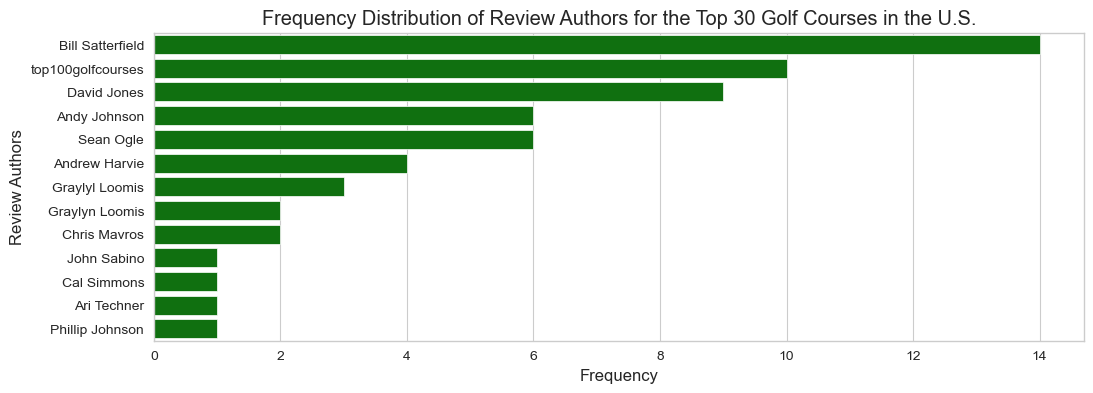

In [3]:
"""
PHASE 1: Exploratory Data Analysis (EDA)

In this phase, I will perform an exploratory data analysis (EDA) on the golf course review corpus to gain a better understanding of
the data. I will perform the following tasks:
    1. Calculate the summary statistics for the year_built column to better understand the distribution of when these top golf courses
       were built.
    2. Create a histogram and boxplot of the year_built column to visualize the distribution of when these top golf courses were built.
    3. Create a frequency distribution for the architect to understand if there are certain architects that designed more of these
       top golf courses.
    4. Create a frequency distribution for the location column to understand the distribution of these top golf courses across different
       states. 
         - Note: The location column contains both the city and state information, so I will need to extract the state information
    5. Create a frquency distribtion of the review_authors column to understand the distribution of reviews by authors.            
"""

### 1. Calculate the summary statistics for the year_built column ###
year_built_summary = golf_course_review['year_built'].describe()
year_built_summary

### 2.a Create a histogram of the year_built column ###
plt.figure(figsize=(12, 4))
sns.histplot(data=golf_course_review, x='year_built', bins=20, kde=True, color='green')
plt.title('Distribution of Year Built for the Top 30 Golf Courses in the United States')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

### 2.b Create a boxplot plot of the year_built column ###
plt.figure(figsize=(12, 3))
sns.boxplot(data=golf_course_review, x='year_built', color='lightgreen')
plt.title('Box-and-Whisker Plot of Year Built for the Top 30 Golf Courses in the United States')
plt.xlabel('Year Built')
plt.show()

### 3. Create a frequency distribution for the architect column ###
# Calculate the frequency of architects
architect_freq = golf_course_review['architect'].value_counts()
# Visualize the frequency distribution of architects
plt.figure(figsize=(12, 6))
sns.barplot(x=architect_freq.values, y=architect_freq.index, color='green')
plt.title('Frequency Distribution of Architects for the Top 30 Golf Courses in the U.S.')
plt.xlabel('Frequency')
plt.ylabel('Architects')
plt.show()

### 4. Create a frequency distribution for the location column ###
# Extract the state information from the location column
golf_course_review['state'] = golf_course_review['location'].apply(lambda x: x.split(',')[-1].strip())
# Calculate the frequency of golf courses by state
state_freq = golf_course_review['state'].value_counts()
# Visualize the frequency distribution of golf courses by state
plt.figure(figsize=(12, 4))
sns.barplot(x=state_freq.values, y=state_freq.index, color='green')
plt.title('Frequency Distribution of Top 30 Golf Courses by state in the U.S.')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

### 5. Create a frequency distribution of the review_authors column ###
# Calculate the frequency of review authors
author_freq = golf_course_review['review_author'].value_counts()
# Visualize the frequency distribution of review authors
plt.figure(figsize=(12, 4))
sns.barplot(x=author_freq.values, y=author_freq.index, color='green')
plt.title('Frequency Distribution of Review Authors for the Top 30 Golf Courses in the U.S.')
plt.xlabel('Frequency')
plt.ylabel('Review Authors')
plt.show()

In [4]:
#### PHASE 2: DATA PREPROCESSING ####

# Ensure that the necessary libraries for this phase are imported
import spacy
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import pandas as pd

# Load necessary NLP models and stopwords that will be used for data preprocessing
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])   # Load the spaCy English language model, disable the parser and named entity recognition for efficiency
standard_stop_words = set(stopwords.words('english'))   # Load the English stopwords from NLTK
tokenizer = RegexpTokenizer(r'\w+')   # Define a regular expression tokenizer to remove and punctuation and perform tokenization using NLTK's RegexpTokenizer
domain_specific_stopwords = set([
    'course', 'play', 'hole', 'green', 'par', 'tee', 'yard', 'golf', 'one', 'bunker', 'fairway', 'leave', 'shot', 'right', 'good'
])

# Define a function to preprocess the text data
def preprocess_text(text):
    """
    Preprocessing a single document by applying several preprocessing steps:
        - Tokenization
        - Non-alphabetic token removal
        - Stort token removal
        - Lowercasing
        - Stopword removal
        - Lemmatization
        - Domain-specific stopword removal
    Args:
        text (str): The original text of the golf course review to be preprocessed
    Returns:
        str: The preprocessed text of the golf course review
    """
    tokens = tokenizer.tokenize(text.lower())   # Tokenize the text and convert it to lowercase
    tokens = [token for token in tokens if token.isalpha() and len(token) > 2]  # Remove non-alphabetic tokens and tokens with less than 3 characters
    tokens = [token for token in tokens if token not in standard_stop_words]   # Remove standard stopwords
    doc = nlp(' '.join(tokens))     # Lemmatization (Part 1): Convert the tokens back to a string for spaCY processing
    tokens = [token.lemma_ for token in doc if token.lemma_ not in domain_specific_stopwords]   # Lemmatization (Part 2): Lemmatize the tokens and remove domain-specific stopwords
    return ' '.join(tokens)   # Return the preprocessed text as a single string

# Apply the preprocessing function to the 'review_text' column of the golf_course_review DataFrame
golf_course_review['cleaned_review_text'] = golf_course_review['review_text'].apply(preprocess_text)

# Display the first few rows of the DataFrame with the cleaned review text
golf_course_review[['review_text', 'cleaned_review_text']].head()

"""
Improvements from previous version:
    - Efficiency: By loading the NLP model and other resources only once outside the function, the code avoids redundant operations, which can be a significant 
      performance enhancement when processing large datasets.
    - Refactoring: Combining similar operations reduces the complexity and increases the readability of the code.
"""

,review_text,cleaned_review_text
0,There’s not much point trying to do a hole-by-...,much point try guide pine valley since other d...
1,What to Expect: Pine Valley is the finest gol...,expect pine valley fine planet hold royal flus...
2,“No one but a poet should be allowed to write ...,poet allow write beauty cypress point club sam...
3,What to Expect: I don't even feel worthy to w...,expect even feel worthy write review cypress p...
4,"There’s not many courses as acclaimed, sought ...",many acclaim seek document shinnecock hill clu...


'\nImprovements from previous version:\n    - Efficiency: By loading the NLP model and other resources only once outside the function, the code avoids redundant operations, which can be a significant \n      performance enhancement when processing large datasets.\n    - Refactoring: Combining similar operations reduces the complexity and increases the readability of the code.\n'

In [5]:
#### PHASE 3: FEATURE EXTRACTION USING TF-IDF ####
### Phase 3.1: Feature Extraction using TF-IDF Vectorization ###

# Ensure the necessary libraries are imported for this phase
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import silhouette_score

# Create a pipeline with TF-IDF Vectorizer and K-Means clustering
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('kmeans', KMeans(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_df': [0.75, 0.85, 0.95],  # Maximum document frequency for the TF-IDF vectorizer
    'tfidf__min_df': [0.01, 0.05, 0.1],     # Minimum document frequency for the TF-IDF vectorizer
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],  # N-gram range for the TF-IDF vectorizer (unigrams, bigrams, trigrams)
    'kmeans__n_clusters': [3, 4, 5, 6, 7, 8, 9, 10]   # Number of clusters for K-Means clustering
}

# Create a GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)  # Using 5-fold cross-validation | verbose=2 for detailed output | n_jobs=-1 for parallel processing

# Fit the GridSearchCV object on the cleaned review text
grid_search.fit(golf_course_review['cleaned_review_text'])

# Print the best parameters and best score from the GridSearchCV
print("Best parameters:", grid_search.best_params_)
print("Best clustering score:", grid_search.best_score_)

# Use the best estimator from the GridSearchCV to transform the cleaned review text into TF-IDF vectors
best_model = grid_search.best_estimator_
tfidf_matrix = best_model.named_steps['tfidf'].transform(golf_course_review['cleaned_review_text'])

# Conver the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=best_model.named_steps['tfidf'].get_feature_names_out(), index=golf_course_review['review_id'])

# Calculate the silhouette score for the best model
labels = best_model.named_steps['kmeans'].labels_
silhouette = silhouette_score(tfidf_matrix, labels)
print("Silhouette Score:", silhouette)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.01, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.01, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.01, tfidf__ngram_range=(1, 1); total time=   0.1s


/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kme

[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.01, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.01, tfidf__ngram_range=(1, 1); total time=   0.1s
[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.01, tfidf__ngram_range=(1, 2); total time=   0.2s
[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.01, tfidf__ngram_range=(1, 2); total time=   0.2s
[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.01, tfidf__ngram_range=(1, 2); total time=   0.1s
[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.01, tfidf__ngram_range=(1, 2); total time=   0.2s
[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.01, tfidf__ngram_range=(1, 2); total time=   0.2s
[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df=0.05, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END kmeans__n_clusters=3, tfidf__max_df=0.75, tfidf__min_df

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('kmeans', KMeans(random_state=42))]),
             n_jobs=-1,
             param_grid={'kmeans__n_clusters': [3, 4, 5, 6, 7, 8, 9, 10],
                         'tfidf__max_df': [0.75, 0.85, 0.95],
                         'tfidf__min_df': [0.01, 0.05, 0.1],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=2)

Best parameters: {'kmeans__n_clusters': 4, 'tfidf__max_df': 0.95, 'tfidf__min_df': 0.1, 'tfidf__ngram_range': (1, 1)}
Best clustering score: -9.438740416343762
Silhouette Score: 0.028566289319471375


/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

<Figure size 1400x1000 with 0 Axes>

<Axes: xlabel='PC1', ylabel='PC2'>

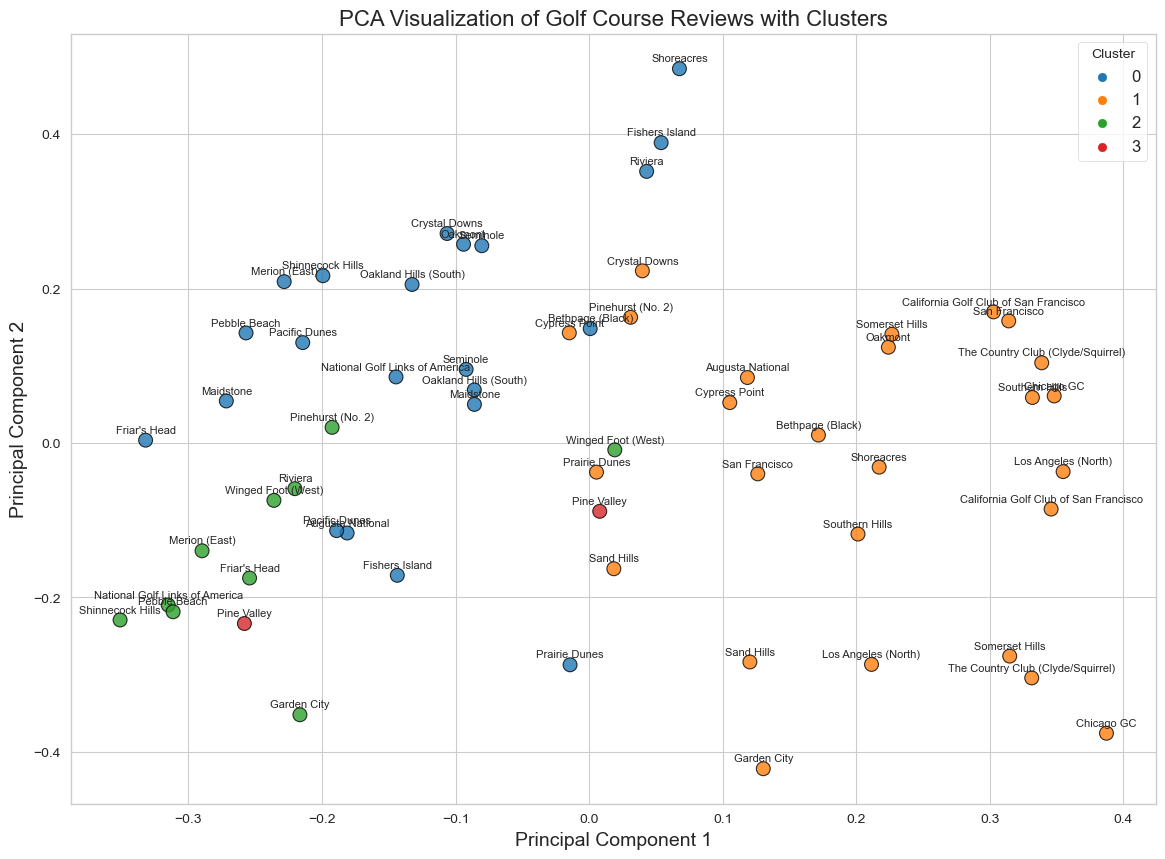

Explained Variance Ratio of PCA Components: [0.06020056 0.0515908 ]


/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



<Figure size 1400x1000 with 0 Axes>

<Axes: xlabel='MDS Component 1', ylabel='MDS Component 2'>

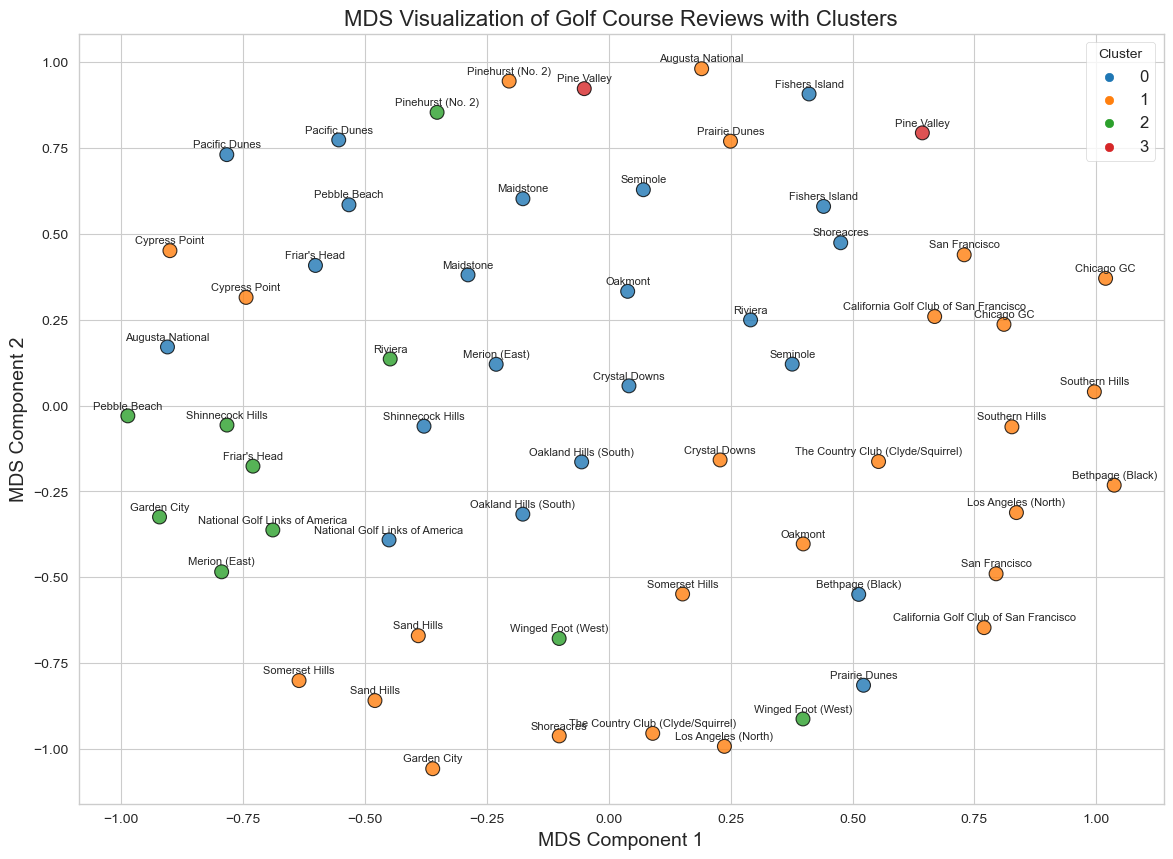

<Figure size 1400x1000 with 0 Axes>

<Axes: xlabel='t-SNE Component 1', ylabel='t-SNE Component 2'>

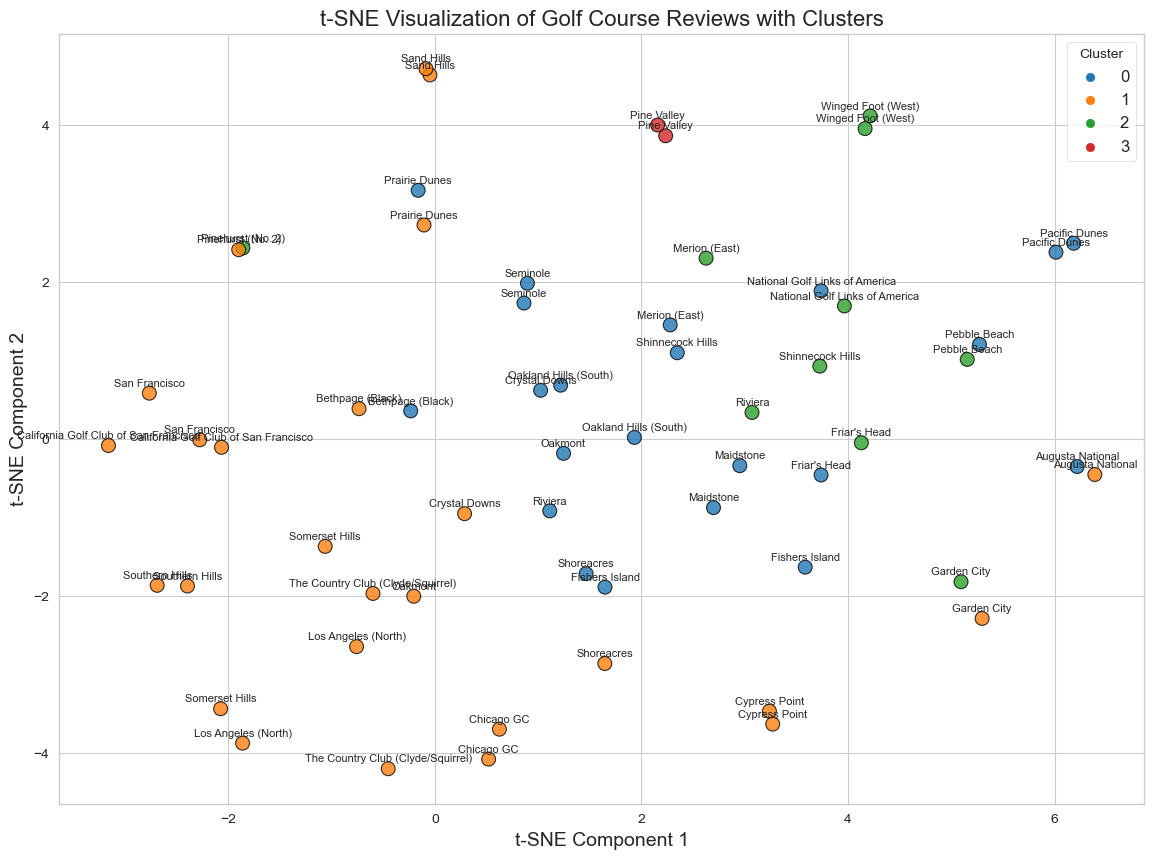

In [104]:
#### PHASE 3: FEATURE EXTRACTION USING TF-IDF ####
### Phase 3.2: Plotting of the TF-IDF Vectors using Multidimensional Reduction for Visualization###

# Ensure the necessary libraries are imported for this phase
from sklearn.decomposition import PCA

## 3.2.1 Perform Principal Component Analysis (PCA) on the TF-IDF Vectors for Visualization ##

# Fit the K-means model using the best parameters found in the GridSearchCV
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(tfidf_matrix)

# Get the cluster labels from the K-means model
cluster_labels = kmeans_model.labels_

# Perform PCA on the TF-IDF matrix to reduce the dimensions for visualization
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2'], index=golf_course_review['review_id'])
pca_df['Cluster'] = cluster_labels

# Plot the PCA results with the cluster labels
plt.figure(figsize=(14, 10))
palette = sns.color_palette("husl", len(pca_doc2vec_df['Cluster'].unique()))    # Define a color palette for the clusters
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=100, alpha=0.8, edgecolor='k')
_ = plt.title('PCA Visualization of Golf Course Reviews with Clusters', fontsize=16)
_ = plt.xlabel('Principal Component 1', fontsize=14)
_ = plt.ylabel('Principal Component 2', fontsize=14)
_ = plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
# Add the golf course names as annotations to the plot
for i, txt in enumerate(golf_course_review['course_name']):
    _ = plt.annotate(txt, (pca_df.iloc[i]['PC1'], pca_df.iloc[i]['PC2']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
# Save the figure with a high resolution
# plt.savefig('tfidf_pca_visualization.png', dpi=300)
plt.show()

# Print the explained variance ratio of the PCA components
print("Explained Variance Ratio of PCA Components:", pca.explained_variance_ratio_)


## 3.2.2 Perform Multidimensional Scaling (MDS) on the TF-IDF Vectors for Visualization ##
# Perform MDS on the TF-IDF matrix to reduce the dimensions for visualization
mds = MDS(n_components=2, random_state=42)
mds_results = mds.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame with the MDS results and cluster labels
mds_df = pd.DataFrame(mds_results, columns=['MDS Component 1', 'MDS Component 2'], index=golf_course_review['review_id'])
mds_df['Cluster'] = cluster_labels

# Plot the MDS results with the cluster labels
plt.figure(figsize=(14, 10))
palette = sns.color_palette("husl", len(mds_df['Cluster'].unique()))    # Define a color palette for the clusters
sns.scatterplot(data=mds_df, x='MDS Component 1', y='MDS Component 2', hue='Cluster', palette='tab10', s=100, alpha=0.8, edgecolor='k')
_ = plt.title('MDS Visualization of Golf Course Reviews with Clusters', fontsize=16)
_ = plt.xlabel('MDS Component 1', fontsize=14)
_ = plt.ylabel('MDS Component 2', fontsize=14)
_ = plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
# Add the golf course names as annotations to the plot
for i, txt in enumerate(golf_course_review['course_name']):
    _ = plt.annotate(txt, (mds_df.iloc[i]['MDS Component 1'], mds_df.iloc[i]['MDS Component 2']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
# Save the figure with a high resolution
# plt.savefig('tfidf_mds_visualization.png', dpi=300)
plt.show()

## 3.2.3 Perform t-SNE on the TF-IDF Vectors for Visualization ##
from sklearn.manifold import TSNE

# Perform t-SNE on the TF-IDF matrix to reduce the dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame with the t-SNE results and cluster labels
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE Component 1', 't-SNE Component 2'], index=golf_course_review['review_id'])
tsne_df['Cluster'] = cluster_labels

# Plot the t-SNE results with the cluster labels
plt.figure(figsize=(14, 10))
palette = sns.color_palette("husl", len(tsne_df['Cluster'].unique()))    # Define a color palette for the clusters
sns.scatterplot(data=tsne_df, x='t-SNE Component 1', y='t-SNE Component 2', hue='Cluster', palette='tab10', s=100, alpha=0.8, edgecolor='k')
_ = plt.title('t-SNE Visualization of Golf Course Reviews with Clusters', fontsize=16)
_ = plt.xlabel('t-SNE Component 1', fontsize=14)
_ = plt.ylabel('t-SNE Component 2', fontsize=14)
_ = plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
# Add the golf course names as annotations to the plot
for i, txt in enumerate(golf_course_review['course_name']):
    _ = plt.annotate(txt, (tsne_df.iloc[i]['t-SNE Component 1'], tsne_df.iloc[i]['t-SNE Component 2']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
# Save the figure with a high resolution
# plt.savefig('tfidf_tsne_visualization.png', dpi=300)
plt.show()


In [107]:
#### PHASE 3: FEATURE EXTRACTION USING TF-IDF ####
### Phase 3.3: Examination of the Top Features in Each TF-IDF Cluster ###

# Get the top features (words) from each cluster based on the TF-IDF vectorizer
tfidf_feature_names = best_model.named_steps['tfidf'].get_feature_names_out()

# Get the cluster centers (centroids) from the K-means model
cluster_centers = kmeans_model.cluster_centers_

# Print the top 10 features (words) for each cluster based on the TF-IDF vectorizer
top_terms_per_cluster = 10
for i, center in enumerate(cluster_centers):
    top_indices = center.argsort()[-top_terms_per_cluster:][::-1]
    top_terms = [tfidf_feature_names[ind] for ind in top_indices]
    print(f"Cluster {i}: {', '.join(top_terms)}")

Cluster 0: back, side, approach, short, get, front, long, shoot, make, well
Cluster 1: club, hill, country, side, back, san, francisco, chicago, sand, short
Cluster 2: get, wing, time, would, really, well, pretty, pinehurst, foot, first
Cluster 3: pine, valley, golfer, get, sand, challenge, find, member, try, plenty


In [36]:
#### PHASE 3: FEATURE EXTRACTION USING TF-IDF ####
### Phase 3.4: Evaluating the TF-IDF Clustering Performance Using the Davies-Bouldin and Calinski-Harabasz Scores ###

# Ensure the necessary libraries are imported for this phase
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Calculate the Davies-Bouldin score for the TF-IDF K-Means clustering
db_score_tfidf = davies_bouldin_score(tfidf_matrix.toarray(), cluster_labels)
print("Davies-Bouldin Score (TF-IDF | K-Means):", db_score_tfidf)

# Calculate Calinski-Harabasz score for the TF-IDF K-Means clustering
ch_score_tfidf = calinski_harabasz_score(tfidf_matrix.toarray(), cluster_labels)
print("Calinski-Harabasz Score (TF-IDF | K-Means):", ch_score_tfidf)

"""
Interpretation:
- Davies-Bouldin Score (TF-IDF | K-Means): 3.3284020487436994
    - The Davies-Bouldin score is a measure of how well the clusters are separated. Lower values indicate better clustering, meaning that the clusters are more compact
      and well-separated from one another. A value of 3.328 suggests that there is some overlap and lack of very distinct separation between the clusters.
- Calinski-Harabasz Score (TF-IDF | K-Means): 2.256131776510228
    - The Calinski-Harabasz score is a measure of the ratio of the sum between-cluster dispersion and within-cluster dispersion. Higher CH scores indicate better, more
      well-defined clusters. A value of 2.256 suggests that the clusters are not as well-separated and distinct from each other. 
"""


Davies-Bouldin Score (TF-IDF | K-Means): 3.3284020487436994
Calinski-Harabasz Score (TF-IDF | K-Means): 2.256131776510228


In [71]:
#### PHASE 4: FEATURE EXTRACTION USING DOC2VEC ####
### Phase 4.1: Doc2Vec Feature Extraction - Train a Doc2Vec Model on the Preprocessed Text Data ###
## 3.1.1: Perform Parameter Tuning for the Doc2Vec Model ##

# Ensure the necessary libraries are imported for this phase
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import pandas as pd

# Define a function to train Doc2Vec models under different parameter settings and evaluate the clustering performance
def evaluate_doc2vec_params(vector_size, window, min_count, epochs):
    """
    Train a Doc2Vec model with the specified parameters and evaluate the clustering performance.
    
    Args:
        vector_size (int): Dimensionality of the feature vectors
        window (int): Maximum distance between the current and predicted word within a sentence
        min_count (int): Ignores all words with total frequency lower than this
        epochs (int): Number of iterations over the corpus
        
    Returns:
        float: Davies-Bouldin score for the Doc2Vec model
        float: Calinski-Harabasz score for the Doc2Vec model
    """ 
    # Create a list of TaggedDocument objects for the Doc2Vec model using the review_id as tags
    tagged_data = [TaggedDocument(words=word_tokenize(review), tags=[str(review_id)]) for review_id, review in zip(golf_course_review['review_id'], golf_course_review['cleaned_review_text'])]
    
    # Train the Doc2Vec model on the tagged data
    doc2vec_model = Doc2Vec(tagged_data, vector_size=vector_size, window=window, min_count=min_count, workers=6, epochs=epochs, seed=42)
    
    # Infer vectors for the tagged data
    vectorized_data = [doc2vec_model.infer_vector(word_tokenize(review)) for review in golf_course_review['cleaned_review_text']]
    
    # Create a DataFrame with the Doc2Vec vectors
    doc2vec_df = pd.DataFrame(vectorized_data, index=golf_course_review['review_id'])
    
    # Perform K-Means clustering on the Doc2Vec vectors
    kmeans_doc2vec = KMeans(n_clusters=4, random_state=42, n_init=10)
    kmeans_doc2vec.fit(doc2vec_df)
    doc2vec_cluster_labels = kmeans_doc2vec.labels_
    
    # Calculate the Davies-Bouldin and Calinski-Harabasz scores for the Doc2Vec model clustering
    db_score_doc2vec = davies_bouldin_score(doc2vec_df, doc2vec_cluster_labels)
    ch_score_doc2vec = calinski_harabasz_score(doc2vec_df, doc2vec_cluster_labels)
    
    # Print the Davies-Bouldin and Calinski-Harabasz scores for each of the parameter settings
    print(f"Doc2Vec Model (vector_size={vector_size}, window={window}, min_count={min_count}, epochs={epochs}):")
    print("Davies-Bouldin Score:", db_score_doc2vec)
    print("Calinski-Harabasz Score:", ch_score_doc2vec)
    print("-----------------------------------------")
    print("\n")
    
# Define the parameter grid for the Doc2Vec model
param_grid = {
    'vector_size': [100, 200],      # Dimensionality of the feature vectors
    'window': [5, 10],             # Maximum distance between the current and predicted word within a sentence
    'min_count': [2, 5],        # Ignores all words with total frequency lower than this
    'epochs': [20, 40]         # Number of iterations over the corpus
}

# Iterate over all combinations of parameters
from itertools import product
for vector_size, window, min_count, epochs in product(param_grid['vector_size'], param_grid['window'], param_grid['min_count'], param_grid['epochs']):
    evaluate_doc2vec_params(vector_size, window, min_count, epochs)
    
"""
Best Parameter Combination:
    The best parameter combination seems to be Vector Size: 200, Window: 10, Min Count: 2, Epochs: 20, which has a:
    - DB Score: 1.113 (lower is better)
    - CH Score: 18.847 (higher is better)
"""


Doc2Vec Model (vector_size=100, window=5, min_count=2, epochs=20):
Davies-Bouldin Score: 1.1617392733204583
Calinski-Harabasz Score: 12.274910423459513
-----------------------------------------


Doc2Vec Model (vector_size=100, window=5, min_count=2, epochs=40):
Davies-Bouldin Score: 2.0914985769082644
Calinski-Harabasz Score: 4.271060872902036
-----------------------------------------


Doc2Vec Model (vector_size=100, window=5, min_count=5, epochs=20):
Davies-Bouldin Score: 1.419020543636879
Calinski-Harabasz Score: 11.041702685169891
-----------------------------------------


Doc2Vec Model (vector_size=100, window=5, min_count=5, epochs=40):
Davies-Bouldin Score: 2.2170424865833813
Calinski-Harabasz Score: 3.3089635454736506
-----------------------------------------


Doc2Vec Model (vector_size=100, window=10, min_count=2, epochs=20):
Davies-Bouldin Score: 1.110596550147603
Calinski-Harabasz Score: 16.219544568514866
-----------------------------------------


Doc2Vec Model (vector_

'\nBest Parameter Combination:\n    The best parameter combination seems to be Vector Size: 200, Window: 10, Min Count: 2, Epochs: 20, which has a:\n    - DB Score: 1.077 (lower is better)\n    - CH Score: 18.845 (higher is better)\n'

### Results Summary Table

| Vector Size | Window | Min Count | Epochs | Davies-Bouldin Score | Calinski-Harabasz Score |
|-------------|--------|-----------|--------|-----------------------|-------------------------|
| 100         | 5      | 2         | 20     | 1.162                 | 12.275                  |
| 100         | 5      | 2         | 40     | 2.091                 | 4.271                   |
| 100         | 5      | 5         | 20     | 1.419                 | 11.042                  |
| 100         | 5      | 5         | 40     | 2.217                 | 3.309                   |
| 100         | 10     | 2         | 20     | 1.111                 | 16.220                  |
| 100         | 10     | 2         | 40     | 1.870                 | 5.833                   |
| 100         | 10     | 5         | 20     | 1.223                 | 14.839                  |
| 100         | 10     | 5         | 40     | 0.822                 | 4.144                   |
| 200         | 5      | 2         | 20     | 1.236                 | 14.504                  |
| 200         | 5      | 2         | 40     | 2.035                 | 4.565                   |
| 200         | 5      | 5         | 20     | 1.208                 | 13.184                  |
| 200         | 5      | 5         | 40     | 2.697                 | 3.175                   |
| 200         | 10     | 2         | 20     | 1.113                 | 17.669                  |
| 200         | 10     | 2         | 40     | 1.847                 | 5.970                   |
| 200         | 10     | 5         | 20     | 1.125                 | 17.333                  |
| 200         | 10     | 5         | 40     | 0.801 (Best DB)       | 4.211                   |

In [83]:
#### PHASE 4: FEATURE EXTRACTION USING DOC2VEC ####
### Phase 4.2: Doc2Vec Feature Extraction - Train a Doc2Vec Model on the Preprocessed Text Data with the Best Parameters ###
## 4.2.1: Train a Doc2Vec Model with the Best Parameters ##

# Ensure the necessary libraries are imported for this phase
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Define the best parameters for the Doc2Vec model
best_params = {
    'vector_size': 200,
    'window': 10,
    'min_count': 2,
    'epochs': 20
}

# Create a list of TaggedDocument objects for the Doc2Vec model using the review_id as tags
tagged_data = [TaggedDocument(words=word_tokenize(review), tags=[str(review_id)]) for review_id, review in zip(golf_course_review['review_id'], golf_course_review['cleaned_review_text'])]

# Train the Doc2Vec model on the tagged data with the best parameters
doc2vec_model = Doc2Vec(tagged_data, vector_size=best_params['vector_size'], window=best_params['window'], min_count=best_params['min_count'], workers=6, epochs=best_params['epochs'], seed=42)

# Infer vectors for the tagged data
vectorized_data = [doc2vec_model.infer_vector(word_tokenize(review)) for review in golf_course_review['cleaned_review_text']]

# Create a DataFrame with the Doc2Vec vectors using the original review_id as the index
doc2vec_df = pd.DataFrame(vectorized_data, index=golf_course_review['review_id'])

# Add the Review file_name to the DataFrame, making sure that it aligns with the review_id
doc2vec_df['file_name'] = golf_course_review.set_index('review_id')['file_name']

# Add the Review course_name to the DataFrame, making sure that it aligns with the review_id
doc2vec_df['course_name'] = golf_course_review.set_index('review_id')['course_name']

# Display the first few rows of the DataFrame with the Doc2Vec vectors
doc2vec_df.head()


,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,file_name,course_name
review_id,,,,,,,,,,,,,,,,,,,,,
1,0.758247,0.334532,0.662412,-0.969784,-1.452459,-0.056621,-0.540431,1.447824,-0.604487,0.751498,...,-1.616516,-1.305179,0.571686,0.438278,-0.591939,-1.846640,-0.404575,0.449962,rev1_pine_valley_1,Pine Valley
2,-0.583047,0.777694,-0.282015,-0.337569,-0.713186,0.035937,0.357105,0.477500,0.080374,0.219585,...,-0.324908,-1.068493,-0.137114,1.019323,-0.222110,-1.226801,-0.313958,0.431196,rev2_pine_valley_2,Pine Valley
3,0.124364,0.330701,0.186648,0.638500,-0.643154,-0.422261,-0.042889,0.492062,0.227912,-0.257268,...,0.179620,-0.762597,-0.153012,-0.076680,0.199799,-0.406188,0.219428,0.161859,rev3_cypress_point_1,Cypress Point
4,-0.003143,0.453401,0.077857,0.595611,-0.408691,-0.241581,0.243255,0.425855,0.370014,-0.337159,...,0.248355,-0.483502,-0.249005,0.319771,0.213825,-0.152499,-0.129052,0.287097,rev4_cypress_point_2,Cypress Point
5,0.912255,-0.271742,0.414065,0.181585,0.259250,0.148568,-0.994248,-0.530339,-0.456095,-0.242638,...,-0.286905,-0.078049,0.277426,-0.494431,-0.135761,-0.457317,1.108192,-0.592611,rev5_shinnecock_1,Shinnecock Hills


In [93]:
#### PHASE 4: FEATURE EXTRACTION USING DOC2VEC ####
### Phase 4.4: K-Means Clustering on the Doc2Vec Vectors and Evaluation of Clustering Performance ###

# Ensure the necessary libraries are imported for this phase
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Perform K-Means clustering on the Doc2Vec vectors
kmeans_doc2vec = KMeans(n_clusters=4, random_state=42, n_init=10)   # Using 4 clusters for K-Means clustering
kmeans_doc2vec.fit(doc2vec_df.drop(columns=['file_name', 'course_name']))   # Fit the K-Means model on the Doc2Vec vectors without the file_name and course_name columns
doc2vec_cluster_labels = kmeans_doc2vec.labels_     # Get the cluster labels from the K-Means model

# Calculate the Davies-Bouldin and Calinski-Harabasz scores for the Doc2Vec model clustering
db_score_doc2vec = davies_bouldin_score(doc2vec_df.drop(columns=['file_name', 'course_name']), doc2vec_cluster_labels)
ch_score_doc2vec = calinski_harabasz_score(doc2vec_df.drop(columns=['file_name', 'course_name']), doc2vec_cluster_labels)

# Print the Davies-Bouldin and Calinski-Harabasz scores for the Doc2Vec model clustering
print("Davies-Bouldin Score (Doc2Vec | K-Means):", db_score_doc2vec)
print("Calinski-Harabasz Score (Doc2Vec | K-Means):", ch_score_doc2vec)

KMeans(n_clusters=4, n_init=10, random_state=42)

Davies-Bouldin Score (Doc2Vec | K-Means): 1.2513085621274276
Calinski-Harabasz Score (Doc2Vec | K-Means): 16.297923885269004


<Figure size 1400x1000 with 0 Axes>

<Axes: xlabel='PC1', ylabel='PC2'>

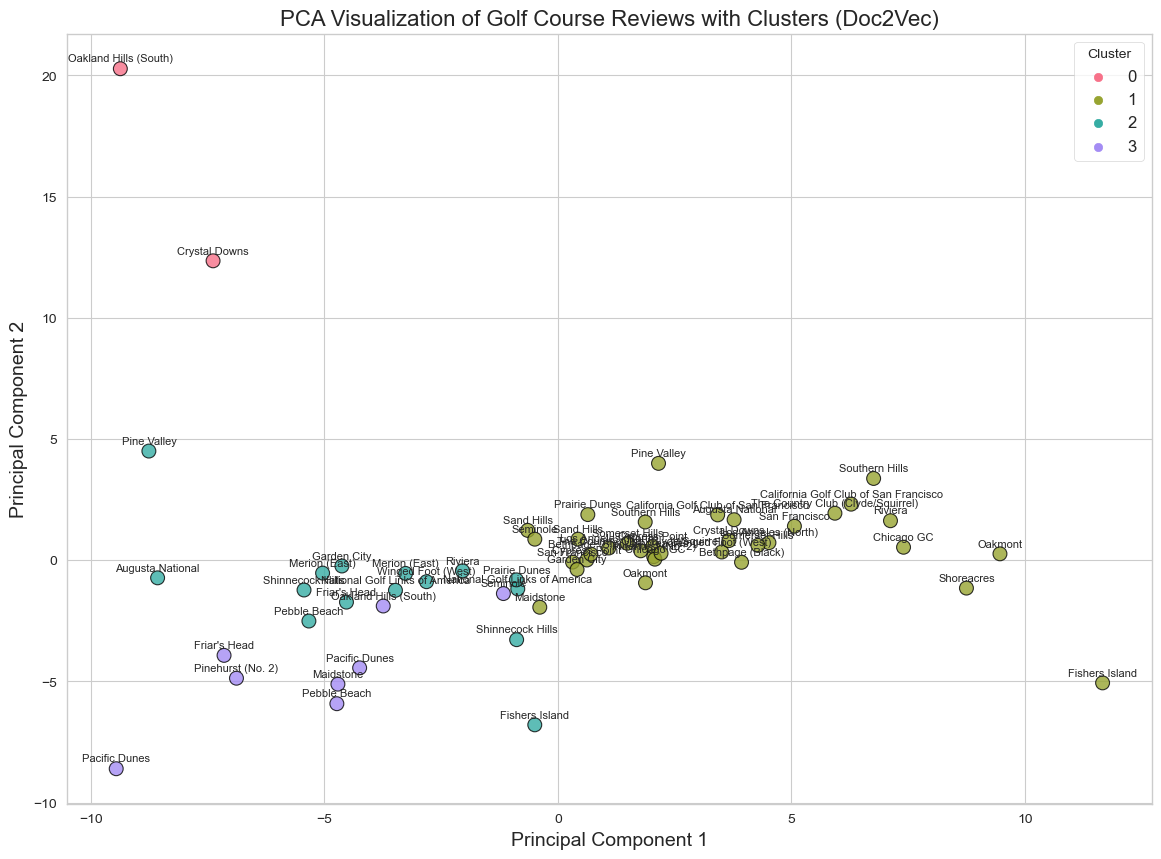

/Users/stefanjenss/anaconda3/envs/NLP_test/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



<Figure size 1400x1000 with 0 Axes>

<Axes: xlabel='MDS1', ylabel='MDS2'>

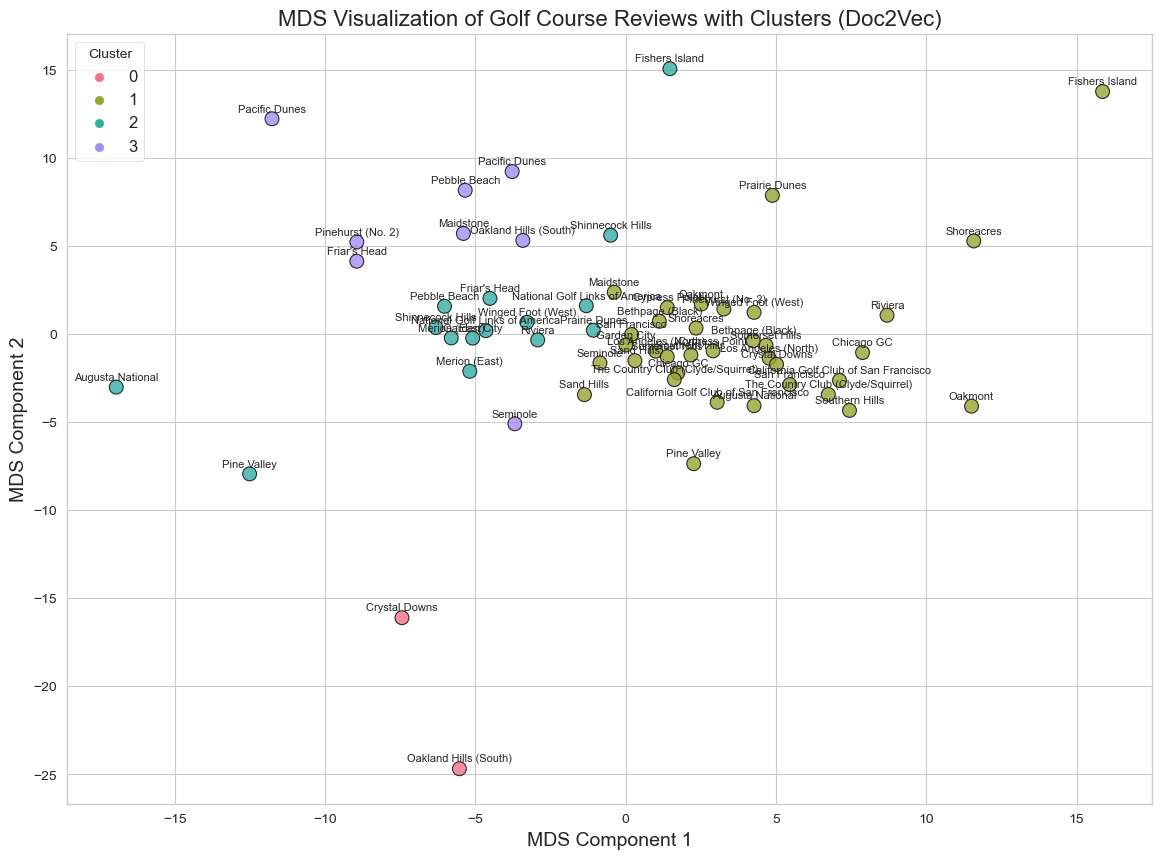

<Figure size 1400x1000 with 0 Axes>

<Axes: xlabel='t-SNE1', ylabel='t-SNE2'>

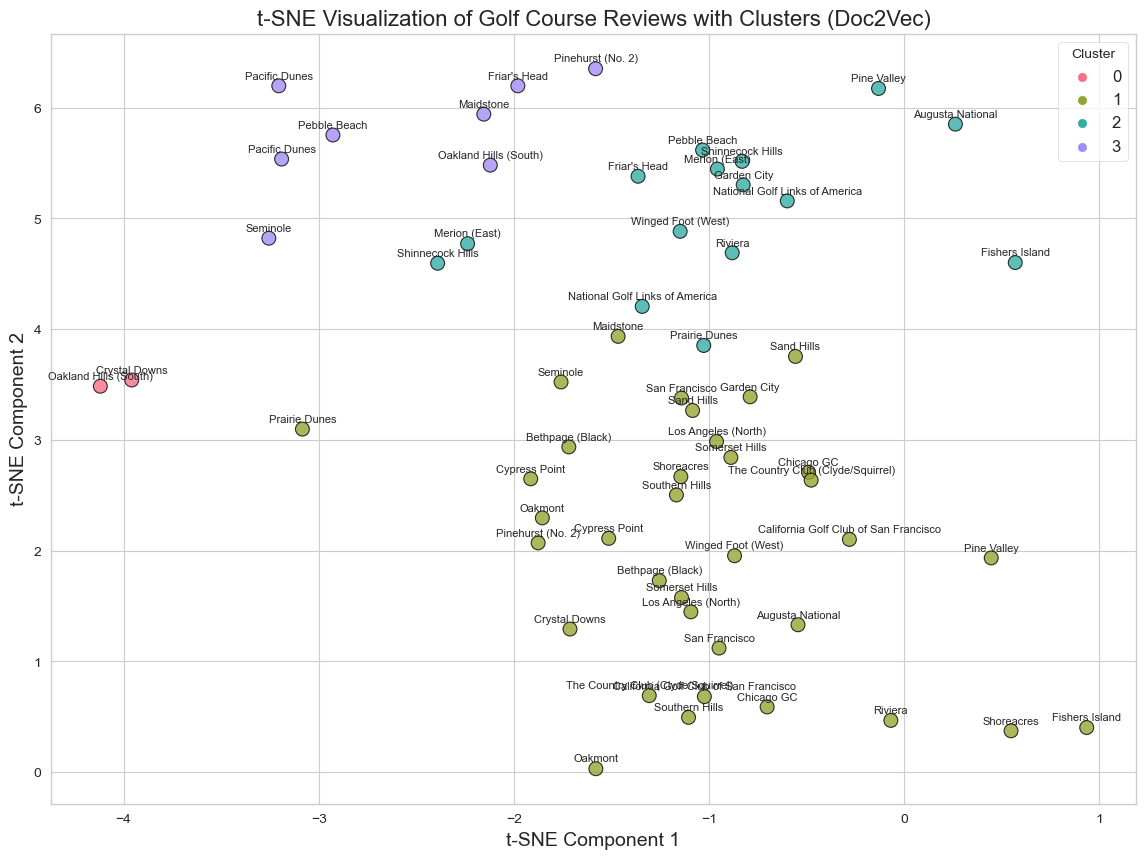

In [105]:
#### PHASE 4: FEATURE EXTRACTION USING DOC2VEC ####
### Phase 4.4: Plot the Doc2Vec Vectors using Multidimensional Reduction for Visualization (PCA | MDS | t-SNE) ###

# Ensure the necessary libraries are imported for this phase
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## 4.4.1 Perform PCA on the Doc2Vec Vectors for Visualization ##

# Perform PCA on the Doc2Vec vectors to reduce the dimensions for visualization
pca_doc2vec = PCA(n_components=2, random_state=42)
pca_results_doc2vec = pca_doc2vec.fit_transform(doc2vec_df.drop(['file_name', 'course_name'], axis =1))

# Create a DataFrame with the PCA results and cluster labels
pca_doc2vec_df = pd.DataFrame(pca_results_doc2vec, columns=['PC1', 'PC2'], index=doc2vec_df.index)
pca_doc2vec_df['Cluster'] = doc2vec_cluster_labels

# Plot the PCA results with the cluster labels for the Doc2Vec vectors (in the same style as the TF-IDF vectors plot)
plt.figure(figsize=(14, 10))
palette = sns.color_palette("husl", len(pca_doc2vec_df['Cluster'].unique()))    # Define a color palette for the clusters
sns.scatterplot(data=pca_doc2vec_df, x='PC1', y='PC2', hue='Cluster', palette=palette, s=100, alpha=0.8, edgecolor='k')
_ = plt.title('PCA Visualization of Golf Course Reviews with Clusters (Doc2Vec)', fontsize=16)
_ = plt.xlabel('Principal Component 1', fontsize=14)
_ = plt.ylabel('Principal Component 2', fontsize=14)
_ = plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
# Add the golf course names as annotations to the plot
for i, txt in enumerate(doc2vec_df['course_name']):
    _ = plt.annotate(txt, (pca_doc2vec_df.iloc[i]['PC1'], pca_doc2vec_df.iloc[i]['PC2']), textcoords='offset points', xytext=(0, 5), ha='center', fontsize=8)
# Save the figure with a high resolution
# plt.savefig('doc2vec_pca_visualization.png', dpi=300)
plt.show()



## 4.4.2 Perform Multidimensional Scaling (MDS) on the Doc2Vec Vectors for Visualization ##
mds = MDS(n_components=2, random_state=42)
mds_results_doc2vec = mds.fit_transform(doc2vec_df.drop(['file_name', 'course_name'], axis=1))

# Create a DataFrame with the MDS results and cluster labels
mds_doc2vec_df = pd.DataFrame(mds_results_doc2vec, columns=['MDS1', 'MDS2'], index=doc2vec_df.index)
mds_doc2vec_df['Cluster'] = doc2vec_cluster_labels

# Plot the MDS results with the cluster labels for the Doc2Vec vectors
plt.figure(figsize=(14, 10))
palette = sns.color_palette("husl", len(mds_doc2vec_df['Cluster'].unique()))    # Define a color palette for the clusters
sns.scatterplot(data=mds_doc2vec_df, x='MDS1', y='MDS2', hue='Cluster', palette=palette, s=100, alpha=0.8, edgecolor='k')
_ = plt.title('MDS Visualization of Golf Course Reviews with Clusters (Doc2Vec)', fontsize=16)
_ = plt.xlabel('MDS Component 1', fontsize=14)
_ = plt.ylabel('MDS Component 2', fontsize=14)
_ = plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
# Add the golf course names as annotations to the plot
for i, txt in enumerate(doc2vec_df['course_name']):
    _ = plt.annotate(txt, (mds_doc2vec_df.iloc[i]['MDS1'], mds_doc2vec_df.iloc[i]['MDS2']), textcoords='offset points', xytext=(0, 5), ha='center', fontsize=8)
# Save the figure with a high resolution
# plt.savefig('doc2vec_mds_visualization.png', dpi=300)
plt.show()



## 4.4.3 Perform t-SNE on the Doc2Vec Vectors for Visualization ##
tsne = TSNE(n_components=2, random_state=42)
tsne_results_doc2vec = tsne.fit_transform(doc2vec_df.drop(['file_name', 'course_name'], axis=1))

# Create a DataFrame with the t-SNE results and cluster labels
tsne_doc2vec_df = pd.DataFrame(tsne_results_doc2vec, columns=['t-SNE1', 't-SNE2'], index=doc2vec_df.index)
tsne_doc2vec_df['Cluster'] = doc2vec_cluster_labels

# Plot the t-SNE results with the cluster labels for the Doc2Vec vectors
plt.figure(figsize=(14, 10))
palette = sns.color_palette("husl", len(tsne_doc2vec_df['Cluster'].unique()))    # Define a color palette for the clusters
sns.scatterplot(data=tsne_doc2vec_df, x='t-SNE1', y='t-SNE2', hue='Cluster', palette=palette, s=100, alpha=0.8, edgecolor='k')
_ = plt.title('t-SNE Visualization of Golf Course Reviews with Clusters (Doc2Vec)', fontsize=16)
_ = plt.xlabel('t-SNE Component 1', fontsize=14)
_ = plt.ylabel('t-SNE Component 2', fontsize=14)
_ = plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
# Add the golf course names as annotations to the plot
for i, txt in enumerate(doc2vec_df['course_name']):
    _ = plt.annotate(txt, (tsne_doc2vec_df.iloc[i]['t-SNE1'], tsne_doc2vec_df.iloc[i]['t-SNE2']), textcoords='offset points', xytext=(0, 5), ha='center', fontsize=8)
# Save the figure with a high resolution
# plt.savefig('doc2vec_tsne_visualization.png', dpi=300)
plt.show()

In [117]:
#### PHASE 4: FEATURE EXTRACTION USING DOC2VEC ####
### Phase 4.5: Examination of the Top Features in Each Doc2Vec Cluster ###

# Ensure the necessary libraries are imported for this phase
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Get the cluster centers (centroids) from the K-means model
centroids = kmeans_doc2vec.cluster_centers_

# Define a function to find the closest words to each cluster center based on cosine similarity with the Doc2Vec word vectors
def get_top_features_for_cluster(doc2vec_model, centroids, top_n=10):
    """
    Get the top features (words) for each cluster based on cosine similarity with the cluster centers.

    Args:
        doc2vec_model (Doc2Vec): The trained Doc2Vec model
        centroid (numpy.ndarray): The cluster centers (centroids) from K-Means clustering
        top_n (int): Number of top features to return for each cluster

    Returns:
        dict: A dictionary containing the top features for each cluster
    """
    top_features = {}
    for i, centroid in enumerate(centroids):
        # Calculate cosine similarities between the centroid and all word vectors in the model
        word_vectors = doc2vec_model.wv.vectors
        similarities = cosine_similarity([centroid], word_vectors)[0]
        
        # Get the top N most similar words
        top_indices = similarities.argsort()[-top_n:][::-1]
        top_words = [doc2vec_model.wv.index_to_key[index] for index in top_indices]
        
        top_features[i] = top_words
    return top_features

# Get the top features for each cluster
top_features = get_top_features_for_cluster(doc2vec_model, centroids, top_n=15)

# Print the top features for each cluster
for cluster, features in top_features.items():
    print(f"Cluster {cluster}: {features}")


Cluster 0: ['monster', 'extraordinary', 'transform', 'swath', 'move', 'ninth', 'shift', 'march', 'temptation', 'storm', 'brilliantly', 'knee', 'abruptly', 'adventurous', 'territory']
Cluster 1: ['feature', 'five', 'four', 'create', 'three', 'epitomize', 'picturesque', 'saucer', 'apology', 'skill', 'momentum', 'venturi', 'utilize', 'combo', 'signature']
Cluster 2: ['feel', 'comprehend', 'like', 'pretty', 'afraid', 'think', 'envision', 'maybe', 'would', 'really', 'hyatt', 'question', 'quirky', 'get', 'ask']
Cluster 3: ['pacific', 'dune', 'dun', 'oregon', 'ocean', 'bandon', 'god', 'dunes', 'letdown', 'well', 'really', 'trail', 'river', 'atlantic', 'think']


# NEXT STEP

### Alternative to the method above, we can try performing TF-IDF within Each Cluster to identify the important words in each cluster.

In [ ]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 4. Doc2Vec representation: Train a Doc2Vec model on the preprocessed text data ###
# Create a list of TaggedDocument objects for the Doc2Vec model
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(golf_course_review['cleaned_review_text'].apply(str.split))]

# Train the Doc2Vec model
model = Doc2Vec(documents, vector_size=200, window=5, min_count=2, workers=6)

# Infer vectors for the golf course reviews - this is done by passing the cleaned review text to the model
doc2vec_df = pd.DataFrame()
for i in range(0, len(golf_course_review)):
    vector = pd.DataFrame(model.infer_vector(golf_course_review['cleaned_review_text'][i].split()).reshape(1,-1))
    doc2vec_df = pd.concat([doc2vec_df, vector], axis=0)

# Reset the index of the Doc2Vec DataFrame
doc2vec_df = doc2vec_df.reset_index()

# Add the file name to the Doc2Vec DataFrame
doc_titles = {'title': golf_course_review['file_name']}
t = pd.DataFrame(doc_titles)

# Concatenate the file name to the Doc2Vec DataFrame
doc2vec_df = pd.concat([doc2vec_df, t], axis = 1)

# Drop the 'index' column from the Doc2Vec DataFrame
doc2vec_df = doc2vec_df.drop(columns = ['index'], axis = 1)

# Display the Doc2Vec DataFrame
doc2vec_df.head()

In [ ]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 5. K-Means clustering with Doc2Vec representation ###
## Use Silhouette score to determine the optimal number of clusters ##
# Convert the Doc2Vec DataFrame to a matrix
doc2vec_matrix = doc2vec_df.drop(columns='title').values

# Perform K-Means clustering for each of the k values
silhouette_scores_list_doc2vec = []
# Define the range of k values to test
k_values = range(2, 11)
# Perform K-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(doc2vec_matrix)
    silhouette_avg = silhouette_score(doc2vec_matrix, cluster_labels)
    silhouette_scores_list_doc2vec.append(silhouette_avg)
# List the silhouette scores for each value of k
silhouette_scores_list_doc2vec

# Plot the silhouette scores for each value of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores_list_doc2vec, marker='o', color='green')
plt.title('Silhouette Scores for Different Values of K in K-Means Clustering with Doc2Vec Representation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhoette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

"""
Interpretation:
The silhouette scores indicate that the optimal number of clusters is 5, since this value of k has the highest silhouette score.
Therefore, I will use k=2 for the K-Means clustering with the Doc2Vec representation.
"""

# Perform K-Means clustering with k=5
kmeans = KMeans(n_clusters=9, random_state=42)
cluster_labels = kmeans.fit_predict(doc2vec_matrix)
# Add the cluster labels to the Doc2Vec DataFrame
doc2vec_df['doc2vec_cluster'] = cluster_labels
# Display the cluster labels
doc2vec_df[['title', 'doc2vec_cluster']].head()

# Calculate the number of reviews in each cluster
cluster_counts_doc2vec = doc2vec_df['doc2vec_cluster'].value_counts().sort_index()
# Display the number of reviews in each cluster
cluster_counts_doc2vec

In [ ]:
"""
PHASE 3 (CONTINUED): COMPARING TF-IDF AND DOC2VEC FOR TEXT REPRESENTATION AND CLUSTERING
"""
### 6. Visualization of Doc2Vec clusters using Multidimensional Scaling (MDS) and Principal Component Analysis (PCA) ###
# 6.a Multidimensional Sclaing (MDS) visualization
# Create a similarity matrix using cosine similarity
similarity_matrix_doc2vec = cosine_similarity(doc2vec_matrix)

# Perform MDS to reduce the dimensionality of the similarity matrix
mds_doc2vec = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

# Fit and transform the MDS coordinates
mds_coordinates_doc2vec = mds_doc2vec.fit_transform(1 - similarity_matrix_doc2vec)

# Convert the MDS coordinates to a DataFrame
mds_df_doc2vec = pd.DataFrame(mds_coordinates_doc2vec, columns=['MDS1', 'MDS2'], index=doc2vec_df['title'])

# Add the cluster labels to the MDS DataFrame
mds_df_doc2vec = mds_df_doc2vec.merge(doc2vec_df[['title', 'doc2vec_cluster']], left_index=True, right_on='title')

# Add the course review author to the MDS DataFrame (this information is in the original golf_course_review DataFrame under the 'review_author' column)
# Merge the MDS DataFrame with the golf_course_review DataFrame to get the review author
mds_df_doc2vec = mds_df_doc2vec.merge(golf_course_review[['file_name', 'review_author']], left_on='title', right_on='file_name')

# Check the MDS DataFrame
mds_df_doc2vec.head()

# Plot the MDS visualization of the Doc2Vec clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=mds_df_doc2vec, x='MDS1', y='MDS2', hue='doc2vec_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('MDS Visualization of Doc2Vec K-Means Clusters')
plt.legend(title='Clusters', loc='upper right')
# Add an annotation to the plot of the review author
for i in range(len(mds_df_doc2vec)):
    plt.text(mds_df_doc2vec['MDS1'][i], mds_df_doc2vec['MDS2'][i], mds_df_doc2vec['review_author'][i], fontsize=8, alpha=0.75)
plt.show()

# 6.b Principal Component Analysis (PCA) visualization
# Perform PCA to reduce the dimensionality of the Doc2Vec matrix
pca_doc2vec = PCA(n_components=2, random_state=42)

# Fit and transform the PCA coordinates
pca_coordinates_doc2vec = pca_doc2vec.fit_transform(doc2vec_matrix)

# Convert the PCA coordinates to a DataFrame
pca_df_doc2vec = pd.DataFrame(pca_coordinates_doc2vec, columns=['PCA1', 'PCA2'], index=doc2vec_df['title'])

# Add the cluster labels to the PCA DataFrame
pca_df_doc2vec = pca_df_doc2vec.merge(doc2vec_df[['title', 'doc2vec_cluster']], left_index=True, right_on='title')

# Add the course review author to the PCA DataFrame
pca_df_doc2vec = pca_df_doc2vec.merge(golf_course_review[['file_name', 'review_author']], left_on='title', right_on='file_name')

# Check the PCA DataFrame
pca_df_doc2vec.head()

# Plot the PCA visualization of the Doc2Vec clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df_doc2vec, x='PCA1', y='PCA2', hue='doc2vec_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('PCA Visualization of Doc2Vec K-Means Clusters')
plt.legend(title = 'Clusters', loc='upper right')
# Add an annotation to the plot of the review author
for i in range(len(pca_df_doc2vec)):
    plt.text(pca_df_doc2vec['PCA1'][i], pca_df_doc2vec['PCA2'][i], pca_df_doc2vec['review_author'][i], fontsize=8, alpha=0.75)
plt.show()




In [ ]:
# Merge the PCA DataFrame with the golf_course_review DataFrame to get the course name
pca_df_doc2vec = pca_df_doc2vec.merge(golf_course_review[['file_name', 'course_name']], left_on='title', right_on='file_name', suffixes=('_pca', '_golf'))
# Merge the MDS DataFrame with the golf_course_review DataFrame to get the course name
mds_df_doc2vec = mds_df_doc2vec.merge(golf_course_review[['file_name', 'course_name']], left_on='title', right_on='file_name', suffixes=('_mds', '_golf'))

# Plot the MDS visualization of the Doc2Vec clusters with course name annotations
plt.figure(figsize=(12, 8))
sns.scatterplot(data=mds_df_doc2vec, x='MDS1', y='MDS2', hue='doc2vec_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('MDS Visualization of Doc2Vec K-Means Clusters with Course Name Annotations')
plt.legend(title='Clusters', loc='upper right')
# Add an annotation to the plot of the course name
for i in range(len(mds_df_doc2vec)):
    plt.text(mds_df_doc2vec['MDS1'][i], mds_df_doc2vec['MDS2'][i], mds_df_doc2vec['course_name'][i], fontsize=10, alpha=0.75, rotation=30)
plt.show()

# Plot the PCA visualization of the Doc2Vec clusters with course name annotations
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df_doc2vec, x='PCA1', y='PCA2', hue='doc2vec_cluster', palette='tab10', s=100, alpha=0.8)
plt.title('PCA Visualization of Doc2Vec K-Means Clusters with Course Name Annotations')
plt.legend(title='Clusters', loc='upper right')
# Add an annotation to the plot of the course name
for i in range(len(pca_df_doc2vec)):
    plt.text(pca_df_doc2vec['PCA1'][i], pca_df_doc2vec['PCA2'][i], pca_df_doc2vec['course_name'][i], fontsize=10, alpha=0.75, rotation=20)
plt.show()

In [ ]:
### 7. Evaluation of the clustering results ###
# Create word clouds for each of the 5 clusters and analyze the common words in each cluster
from wordcloud import WordCloud
# Define a function to generate a word cloud for a given cluster
def generate_word_cloud(cluster_number, cluster_df):
    # Get the indices of the reviews in the cluster
    cluster_indices = cluster_df[cluster_df['doc2vec_cluster'] == cluster_number].index
    # Concatenate the review text for the cluster
    cluster_text = ' '.join([golf_course_review['cleaned_review_text'][i] for i in cluster_indices])
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    # Display the word cloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_number}')
    plt.show()

# Generate word clouds for each of the 5 clusters
for i in range(9):
    generate_word_cloud(i, doc2vec_df)
    
# Calculate the Davies-Bouldin score for the Doc2Vec clusters
davies_bouldin_score = silhouette_score(doc2vec_matrix, doc2vec_df['doc2vec_cluster'])
davies_bouldin_score

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
"""
PHASE 4: TOPIC MODELING USING LATENT DIRICHLET ALLOCATION (LDA)

In this phase, I will perform topic modeling on the golf course reviews using Latent Dirichlet Allocation (LDA). 
I will perform the following steps to extract topics from the reviews:
    1. Tokenization: Tokenize the preprocessed text data
    2. Dictionary and Corpus creation: Create a dictionary and a corpus from the tokenized text data
    3. LDA model training: Train an LDA model on the corpus
    4. Topic extraction: Extract topics from the LDA model
    5. Visualization: Visualize the topics using the pyLADavis library
    
    Note: The number of topics in the LDA model is a hyperparameter that needs to be tuned.
"""
### 1. Tokenization: Tokenize the preprocessed text data ###
# Tokenize the procossed text
golf_course_review['tokenized_text'] = golf_course_review['cleaned_review_text'].apply(lambda x: x.split())

# Display the tokenized text
golf_course_review[['review_id', 'file_name', 'tokenized_text']].head()

### 2. Dictionary and Corpus creation: Create a dictionary and a corpus from the tokenized text data ###
# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(golf_course_review['tokenized_text'])

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(text) for text in golf_course_review['tokenized_text']]

### 3. LDA model training: Train an LDA model on the corpus ###
## Hyperparameter tuning for the number of topics ##
# Define the range of k values to test
k_values = range(2, 11)

# Initialize the list to store coherence scores
coherence_scores = []

# Perform LDA for each value of k
for k in k_values:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=10)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=golf_course_review['tokenized_text'], dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model_lda.get_coherence())
    
# List the coherence scores for each value of k
coherence_scores

In [ ]:

# Plot the coherence scores for each value of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, coherence_scores, marker='o', color='green')
plt.title('Coherence Scores for Different Values of K in LDA Topic Modeling')
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

"""
Interpretation:
The coherence scores indicate that the optimal number of topics is 7, since this value of k has the hightest coherence score.
Theresfore, I will use k=7 for the LDA topic modeling.
"""

# Train an LDA model with k=7
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=9, random_state=42)

In [ ]:
# Print the topics extracted from the LDA model
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

In [ ]:
### 4. Topic extraction: Extract topics from the LDA model ###
# Extract the topics from the LDA model
topics = lda_model.print_topics(num_words=10)

# Display the topics extracted from the LDA model with the top words for each topic
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")
    
### 5. Visualization: Visualize the topics using the pyLDAvis library ###
import pyLDAvis.gensim_models
# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
